In [190]:
import numpy as np
import pandas as pd
pop_df = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv')
print(pop_df.shape)
pop_df.head()

(1404753, 12)


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,0-4,0,5,630.044,661.578,1291.622
1,4,Afghanistan,2,Medium,1950,1950.5,5-9,5,5,516.206,487.335,1003.541
2,4,Afghanistan,2,Medium,1950,1950.5,10-14,10,5,461.378,423.326,884.704
3,4,Afghanistan,2,Medium,1950,1950.5,15-19,15,5,414.369,369.363,783.732
4,4,Afghanistan,2,Medium,1950,1950.5,20-24,20,5,374.109,318.392,692.501


In [200]:
pop_df_tmp = pop_df[(pop_df['Location']=='Bangladesh') & (pop_df['Time']==2020)]
pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)
pop_df_tmp.head()


164689.383

In [201]:
pop_df_tmp['PopMale'] = pop_df_tmp['PopMale'].multiply(1000)
pop_df_tmp['PopFemale'] = pop_df_tmp['PopFemale'].multiply(1000)
pop_df_tmp['PopTotal'] = pop_df_tmp['PopTotal'].multiply(1000)
pop_df_tmp.head()
tot= pop_df_tmp['PopTotal'].sum()
tot

164689383.0

In [0]:
def plot_poulation_pyramid(country, year):
    pop_df_tmp = pop_df[(pop_df['Location']==country) & (pop_df['Time']==year)]
    pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)

    y = range(0, len(pop_df_tmp))
    x_male = pop_df_tmp['PopMale']
    x_female = pop_df_tmp['PopFemale']
    
    # max xlim
    max_x_scale = max(max(x_female), max(x_male))

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))

    fig.patch.set_facecolor('xkcd:Beige')
    plt.figtext(.5,.9,country + ": " +  str(year), fontsize=15, ha='center')


    axes[0].barh(y, x_male, align='center', color='blue')
    axes[0].set(title='Males')
    axes[0].set(xlim=[0,max_x_scale])
    axes[1].barh(y, x_female, align='center', color='green')
    axes[1].set(title='Females')
    axes[1].set(xlim=[0,max_x_scale])
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=pop_df_tmp['AgeGrp'])
    axes[0].invert_xaxis()
    axes[0].grid()
    plt.show()


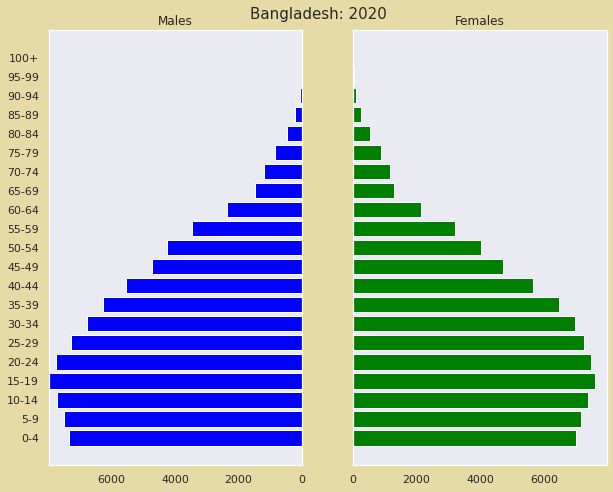

In [203]:
country = 'Bangladesh'
year = 2020
plot_poulation_pyramid(country, year)

In [0]:
#TotalEduGrp=pop_df_tmp.query('AgeGrpStart <= 20')['PopTotal'].sum()
TotalEduGrp= pop_df_tmp[(pop_df_tmp['AgeGrpStart'] <=30)]['PopTotal'].sum()
PrymaryEduGrp=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] >0) & (pop_df_tmp['AgeGrpStart'] <10)]['PopTotal'].sum()
SecNHigEduGrp=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] >5) & (pop_df_tmp['AgeGrpStart'] <20)]['PopTotal'].sum()
GradEduGrp=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] ==20)]['PopTotal'].sum()
PostGradEduGrp=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] ==25)]['PopTotal'].sum()

data = {'Group':['Total', 'Primary', 'Sec. & Higher Sec.', 'Graduate','Post Grad.'], 'Population':[TotalEduGrp, PrymaryEduGrp, SecNHigEduGrp, GradEduGrp,PostGradEduGrp]}
EduDF = pd.DataFrame(data) 

In [211]:
tot= pop_df_tmp['PopTotal'].sum()
tot

164689383.0

ERROR! Session/line number was not unique in database. History logging moved to new session 65


In [207]:
EduDF

,Group,Population
0,Total,103175154.0
1,Primary,14644431.0
2,Sec. & Higher Sec.,30674422.0
3,Graduate,15239226.0
4,Post Grad.,14525807.0


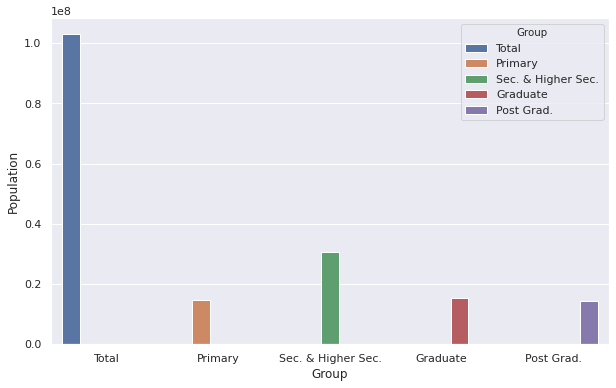

In [208]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="Group",y="Population", hue="Group",data=EduDF)

In [0]:
def dependency(loMin,loMax,HiMin,HiMax):
  lo=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] >=LoMin) & (pop_df_tmp['AgeGrpStart'] <=LoMax)]['PopTotal'].sum()
  hi=pop_df_tmp[(pop_df_tmp['AgeGrpStart'] >=HiMin) & (pop_df_tmp['AgeGrpStart'] <=HiMax)]['PopTotal'].sum()
  depGrp=lo+hi
  tot= pop_df_tmp['PopTotal'].sum()
  working=tot-depGrp
  datadep = {'Group':['Dependent', 'Independent'], 'Population':[depGrp, working]}
  DepDF = pd.DataFrame(datadep)
  plt.pie(DepDF['Population'],labels=DepDF['Group'],colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

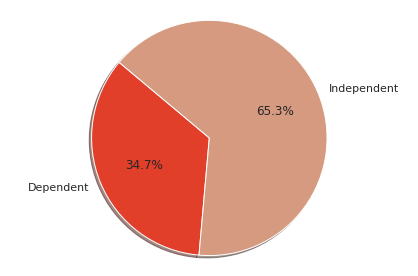

In [210]:
loMin=0
loMax=15
HiMin=60
HiMax=100
dependency(loMin,loMax,HiMin,HiMax)

In [243]:
def HealthCareF(drR,nrR,stR,bedR,ambuR,otR,icuR,xrayR,pathoR,ecgR,ultraR,ctmrR):
 totT= pop_df_tmp['PopTotal'].sum()
 dr=(drR/1000)*totT
 nr=(nrR/1000)*totT
 st=(stR/1000)*totT
 bed=(bedR/1000)*totT
 ambu=(ambuR/1000)*totT
 ot=(otR/1000)*totT
 icu=(icuR/1000)*totT
 xray=(xrayR/1000)*totT
 patho=(pathoR/1000)*totT
 ecg=(ecgR/1000)*totT
 ultra=(ultraR/1000)*totT
 ctmr=(ctmrR/1000)*totT
 
 dataH = {'Type':['Doctor', 'Nurse', 'Other Staff', 'Hospital Bed','Ambulance','OT','ICU','X-Ray','Pathology','ECG',
                  'USG','CT/MR'], 'Number':[dr, nr, st, bed,ambu,ot,icu,xray,patho,ecg,ultra,ctmr]}
 HealthDF = pd.DataFrame(dataH) 


 plt.figure(figsize=(18,9))
 sns.set(style="darkgrid")
 ax = sns.barplot(x="Type",y="Number", hue="Type",data=HealthDF)

ERROR! Session/line number was not unique in database. History logging moved to new session 83


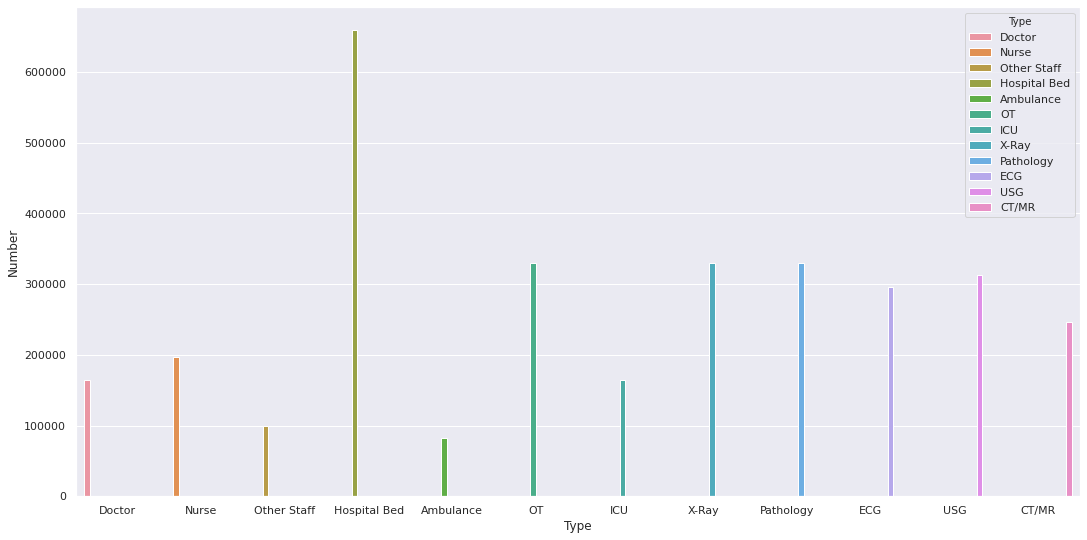

In [244]:
drR=1
nrR=1.2
stR=0.6
bedR=4
ambuR=0.5
otR=2
icuR=1
xrayR=2
pathoR=2
ecgR=1.8
ultraR=1.9
ctmrR=1.5
HealthCareF(drR,nrR,stR,bedR,ambuR,otR,icuR,xrayR,pathoR,ecgR,ultraR,ctmrR)